In [288]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
#njobs = 4

In [289]:
# Get data
train = pd.read_csv("train.csv")
print("train : " + str(train.shape))

train : (1460, 81)


In [290]:
# Check for duplicates   
if len(train.TrainId) == len(set(train.TrainId)):
    print "no duplicates"
else:
    print "duplicates"
train = train.drop("TrainId", axis = 1)

no duplicates


In [291]:
train = train.ix[~((train.GrLivArea>4000) & (train.SalePrice<300000))]

/Users/mohitsharma/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [292]:
train_labels = train.SalePrice
train_features = train.drop(['SalePrice'],axis=1)

In [293]:
train_features.Alley = train_features.Alley.fillna("None")
train_features.BedroomAbvGr = train_features.BedroomAbvGr.fillna(0)
train_features.BsmtQual = train_features.BsmtQual.fillna("No")
train_features.BsmtCond = train_features.BsmtCond.fillna("No")
train_features.BsmtExposure = train_features.BsmtExposure.fillna("No")
train_features.BsmtFinType1 = train_features.BsmtFinType1.fillna("No")
train_features.BsmtFinType2 = train_features.BsmtFinType2.fillna("No")
train_features.BsmtFullBath = train_features.BsmtFullBath.fillna(0)
train_features.BsmtHalfBath = train_features.BsmtHalfBath.fillna(0)
train_features.BsmtUnfSF = train_features.BsmtUnfSF.fillna(0)
train_features.CentralAir = train_features.CentralAir.fillna("N")
train_features.Condition1 = train_features.Condition1.fillna("Norm")
train_features.Condition2 = train_features.Condition2.fillna("Norm")
train_features.EnclosedPorch = train_features.EnclosedPorch.fillna(0)
train_features.ExterCond = train_features.ExterCond.fillna("TA")
train_features.ExterQual = train_features.ExterQual.fillna("TA")
train_features.Fence = train_features.Fence.fillna("NA")
train_features.FireplaceQu = train_features.FireplaceQu.fillna("No")
train_features.Fireplaces = train_features.Fireplaces.fillna(0)
train_features.Functional = train_features.Functional.fillna("Typ")
train_features.GarageType = train_features.GarageType.fillna("NA")
train_features.GarageFinish = train_features.GarageFinish.fillna("NA")
train_features.GarageQual = train_features.GarageQual.fillna("No")
train_features.GarageCond = train_features.GarageCond.fillna("No")
train_features.GarageArea = train_features.GarageArea.fillna(0)
train_features.GarageCars = train_features.GarageCars.fillna(0)
train_features.HalfBath = train_features.HalfBath.fillna(0)
train_features.HeatingQC = train_features.HeatingQC.fillna("TA")
train_features.KitchenAbvGr = train_features.KitchenAbvGr.fillna(0)
train_features.KitchenQual = train_features.KitchenQual.fillna("TA")
train_features.LotShape = train_features.LotShape.fillna("Reg")
train_features.MasVnrType = train_features.MasVnrType.fillna("None")
train_features.MasVnrArea = train_features.MasVnrArea.fillna(0)
train_features.MiscFeature = train_features.MiscFeature.fillna("NA")
train_features.MiscVal = train_features.MiscVal.fillna(0)
train_features.OpenPorchSF = train_features.OpenPorchSF.fillna(0)
train_features.PavedDrive = train_features.PavedDrive.fillna("N")
train_features.PoolQC = train_features.PoolQC.fillna("No")
train_features.PoolArea = train_features.PoolArea.fillna(0)
train_features.SaleCondition = train_features.SaleCondition.fillna("Normal")
train_features.ScreenPorch = train_features.ScreenPorch.fillna(0)
train_features.TotRmsAbvGrd = train_features.TotRmsAbvGrd.fillna(0)
train_features.Utilities = train_features.Utilities.fillna("AllPub")
train_features.WoodDeckSF = train_features.WoodDeckSF.fillna(0)

In [294]:
train_features.Alley = train_features.Alley.replace(["None","Grvl","Pave"],[0,1,2])
train_features.BsmtQual = train_features.BsmtQual.replace(["No","Po","Fa","TA","Gd","Ex"],[0,1,2,3,4,5])
train_features.BsmtCond = train_features.BsmtCond.replace(["No","Po","Fa","TA","Gd","Ex"],[0,1,2,3,4,5])
train_features.BsmtExposure = train_features.BsmtExposure.replace(["No","Mn","Av","Gd"],[0,1,2,3])
train_features.BsmtFinType1 = train_features.BsmtFinType1.replace(["No" ,"Unf","LwQ","Rec","BLQ","ALQ","GLQ"],[0,1,2,3,4,5,6])
train_features.BsmtFinType2 = train_features.BsmtFinType2.replace(["No" ,"Unf","LwQ","Rec","BLQ","ALQ","GLQ"],[0,1,2,3,4,5,6])
train_features.CentralAir = train_features.CentralAir.replace(["N","Y"],[0,1])
train_features.Condition1 = train_features.Condition1.replace(["Artery","Feedr","Norm","RRNn","RRAn","PosN","PosA","RRNe","RRAe"],[0,1,2,3,4,5,6,7,8])
train_features.Condition2 = train_features.Condition2.replace(["Artery","Feedr","Norm","RRNn","RRAn","PosN","PosA","RRNe","RRAe"],[0,1,2,3,4,5,6,7,8])
train_features.ExterCond = train_features.ExterCond.replace(["Po","Fa","TA","Gd","Ex"],[1,2,3,4,5])
train_features.ExterQual = train_features.ExterQual.replace(["Po","Fa","TA","Gd","Ex"],[1,2,3,4,5])
train_features.Fence = train_features.Fence.replace(["GdPrv","MnPrv","GdWo","MnWw","NA"],[0,1,2,3,4])
train_features.FireplaceQu = train_features.FireplaceQu.replace(["No","Po","Fa","TA","Gd","Ex"],[0,1,2,3,4,5])
train_features.Functional = train_features.Functional.replace(["Sal","Sev","Maj2","Maj1","Mod","Min2","Min1","Typ"],[1,2,3,4,5,6,7,8])
train_features.GarageType = train_features.GarageType.replace(["2Types","Attchd","Basment","BuiltIn","CarPort","Detchd","NA"],[0,1,2,3,4,5,6])
train_features.GarageFinish = train_features.GarageFinish.replace(["Fin","RFn","Unf","NA"],[0,1,2,3])
train_features.GarageQual = train_features.GarageQual.replace(["No","Po","Fa","TA","Gd","Ex"],[0,1,2,3,4,5])
train_features.GarageCond = train_features.GarageCond.replace(["No","Po","Fa","TA","Gd","Ex"],[0,1,2,3,4,5])
train_features.HeatingQC = train_features.HeatingQC.replace(["Po","Fa","TA","Gd","Ex"],[1,2,3,4,5])
train_features.KitchenQual = train_features.KitchenQual.replace(["Po","Fa","TA","Gd","Ex"],[1,2,3,4,5])
train_features.LotShape = train_features.LotShape.replace(["IR3","IR2","IR1","Reg"],[1,2,3,4])
train_features.MasVnrType = train_features.MasVnrType.replace(["BrkCmn","BrkFace","CBlock","None","Stone"],[0,1,2,3,4])
train_features.MiscFeature = train_features.MiscFeature.replace(["Elev","Gar2","Othr","Shed","TenC","NA"],[0,1,2,3,4,5])
train_features.PavedDrive = train_features.PavedDrive.replace(["N","P","Y"],[0,1,2])
train_features.PoolQC = train_features.PoolQC.replace(["No","Fa","TA","Gd","Ex"],[0,1,2,3,4])
train_features.SaleCondition = train_features.SaleCondition.replace(["Abnorml","Alloca","AdjLand","Family","Normal","Partial"],[0,1,2,3,4,5])
train_features.Utilities = train_features.Utilities.replace(["ELO","NoSeWa","NoSewr","AllPub"],[1,2,3,4])

In [295]:
train_features = train_features[['GrLivArea','Alley','BedroomAbvGr','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFullBath','BsmtHalfBath','BsmtUnfSF','CentralAir','Condition1','Condition2','EnclosedPorch','ExterCond','ExterQual','Fence','FireplaceQu','Fireplaces','Functional','GarageType','GarageFinish','GarageQual','GarageCond','GarageArea','GarageCars','HalfBath','HeatingQC','KitchenAbvGr','KitchenQual','LotShape','MasVnrType','MasVnrArea','MiscFeature','MiscVal','OpenPorchSF','PavedDrive','PoolQC','PoolArea','SaleCondition','ScreenPorch','TotRmsAbvGrd','Utilities','WoodDeckSF']]
train_features.columns.size

45

In [296]:
# Get data
test = pd.read_csv("test.csv")
print("test : " + str(test.shape))

test : (1459, 80)


In [297]:
# Check for duplicates   
if len(test.Id) == len(set(test.Id)):
    print "no duplicates"
else:
    print "duplicates"
test = test.drop("Id", axis = 1)

no duplicates


In [298]:
test.Alley = test.Alley.fillna("None")
test.BedroomAbvGr = test.BedroomAbvGr.fillna(0)
test.BsmtQual = test.BsmtQual.fillna("No")
test.BsmtCond = test.BsmtCond.fillna("No")
test.BsmtExposure = test.BsmtExposure.fillna("No")
test.BsmtFinType1 = test.BsmtFinType1.fillna("No")
test.BsmtFinType2 = test.BsmtFinType2.fillna("No")
test.BsmtFullBath = test.BsmtFullBath.fillna(0)
test.BsmtHalfBath = test.BsmtHalfBath.fillna(0)
test.BsmtUnfSF = test.BsmtUnfSF.fillna(0)
test.CentralAir = test.CentralAir.fillna("N")
test.Condition1 = test.Condition1.fillna("Norm")
test.Condition2 = test.Condition2.fillna("Norm")
test.EnclosedPorch = test.EnclosedPorch.fillna(0)
test.ExterCond = test.ExterCond.fillna("TA")
test.ExterQual = test.ExterQual.fillna("TA")
test.Fence = test.Fence.fillna("NA")
test.FireplaceQu = test.FireplaceQu.fillna("No")
test.Fireplaces = test.Fireplaces.fillna(0)
test.Functional = test.Functional.fillna("Typ")
test.GarageType = test.GarageType.fillna("NA")
test.GarageFinish = test.GarageFinish.fillna("NA")
test.GarageQual = test.GarageQual.fillna("No")
test.GarageCond = test.GarageCond.fillna("No")
test.GarageArea = test.GarageArea.fillna(0)
test.GarageCars = test.GarageCars.fillna(0)
test.HalfBath = test.HalfBath.fillna(0)
test.HeatingQC = test.HeatingQC.fillna("TA")
test.KitchenAbvGr = test.KitchenAbvGr.fillna(0)
test.KitchenQual = test.KitchenQual.fillna("TA")
test.LotShape = test.LotShape.fillna("Reg")
test.MasVnrType = test.MasVnrType.fillna("None")
test.MasVnrArea = test.MasVnrArea.fillna(0)
test.MiscFeature = test.MiscFeature.fillna("NA")
test.MiscVal = test.MiscVal.fillna(0)
test.OpenPorchSF = test.OpenPorchSF.fillna(0)
test.PavedDrive = test.PavedDrive.fillna("N")
test.PoolQC = test.PoolQC.fillna("No")
test.PoolArea = test.PoolArea.fillna(0)
test.SaleCondition = test.SaleCondition.fillna("Normal")
test.ScreenPorch = test.ScreenPorch.fillna(0)
test.TotRmsAbvGrd = test.TotRmsAbvGrd.fillna(0)
test.Utilities = test.Utilities.fillna("AllPub")
test.WoodDeckSF = test.WoodDeckSF.fillna(0)

In [299]:
test.Alley = test.Alley.replace(["None","Grvl","Pave"],[0,1,2])
test.BsmtQual = test.BsmtQual.replace(["No","Po","Fa","TA","Gd","Ex"],[0,1,2,3,4,5])
test.BsmtCond = test.BsmtCond.replace(["No","Po","Fa","TA","Gd","Ex"],[0,1,2,3,4,5])
test.BsmtExposure = test.BsmtExposure.replace(["No","Mn","Av","Gd"],[0,1,2,3])
test.BsmtFinType1 = test.BsmtFinType1.replace(["No" ,"Unf","LwQ","Rec","BLQ","ALQ","GLQ"],[0,1,2,3,4,5,6])
test.BsmtFinType2 = test.BsmtFinType2.replace(["No" ,"Unf","LwQ","Rec","BLQ","ALQ","GLQ"],[0,1,2,3,4,5,6])
test.CentralAir = test.CentralAir.replace(["N","Y"],[0,1])
test.Condition1 = test.Condition1.replace(["Artery","Feedr","Norm","RRNn","RRAn","PosN","PosA","RRNe","RRAe"],[0,1,2,3,4,5,6,7,8])
test.Condition2 = test.Condition2.replace(["Artery","Feedr","Norm","RRNn","RRAn","PosN","PosA","RRNe","RRAe"],[0,1,2,3,4,5,6,7,8])
test.ExterCond = test.ExterCond.replace(["Po","Fa","TA","Gd","Ex"],[1,2,3,4,5])
test.ExterQual = test.ExterQual.replace(["Po","Fa","TA","Gd","Ex"],[1,2,3,4,5])
test.Fence = test.Fence.replace(["GdPrv","MnPrv","GdWo","MnWw","NA"],[0,1,2,3,4])
test.FireplaceQu = test.FireplaceQu.replace(["No","Po","Fa","TA","Gd","Ex"],[0,1,2,3,4,5])
test.Functional = test.Functional.replace(["Sal","Sev","Maj2","Maj1","Mod","Min2","Min1","Typ"],[1,2,3,4,5,6,7,8])
test.GarageType = test.GarageType.replace(["2Types","Attchd","Basment","BuiltIn","CarPort","Detchd","NA"],[0,1,2,3,4,5,6])
test.GarageFinish = test.GarageFinish.replace(["Fin","RFn","Unf","NA"],[0,1,2,3])
test.GarageQual = test.GarageQual.replace(["No","Po","Fa","TA","Gd","Ex"],[0,1,2,3,4,5])
test.GarageCond = test.GarageCond.replace(["No","Po","Fa","TA","Gd","Ex"],[0,1,2,3,4,5])
test.HeatingQC = test.HeatingQC.replace(["Po","Fa","TA","Gd","Ex"],[1,2,3,4,5])
test.KitchenQual = test.KitchenQual.replace(["Po","Fa","TA","Gd","Ex"],[1,2,3,4,5])
test.LotShape = test.LotShape.replace(["IR3","IR2","IR1","Reg"],[1,2,3,4])
test.MasVnrType = test.MasVnrType.replace(["BrkCmn","BrkFace","CBlock","None","Stone"],[0,1,2,3,4])
test.MiscFeature = test.MiscFeature.replace(["Elev","Gar2","Othr","Shed","TenC","NA"],[0,1,2,3,4,5])
test.PavedDrive = test.PavedDrive.replace(["N","P","Y"],[0,1,2])
test.PoolQC = test.PoolQC.replace(["No","Fa","TA","Gd","Ex"],[0,1,2,3,4])
test.SaleCondition = test.SaleCondition.replace(["Abnorml","Alloca","AdjLand","Family","Normal","Partial"],[0,1,2,3,4,5])
test.Utilities = test.Utilities.replace(["ELO","NoSeWa","NoSewr","AllPub"],[1,2,3,4])

In [300]:
test_features = test[['GrLivArea','Alley','BedroomAbvGr','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFullBath','BsmtHalfBath','BsmtUnfSF','CentralAir','Condition1','Condition2','EnclosedPorch','ExterCond','ExterQual','Fence','FireplaceQu','Fireplaces','Functional','GarageType','GarageFinish','GarageQual','GarageCond','GarageArea','GarageCars','HalfBath','HeatingQC','KitchenAbvGr','KitchenQual','LotShape','MasVnrType','MasVnrArea','MiscFeature','MiscVal','OpenPorchSF','PavedDrive','PoolQC','PoolArea','SaleCondition','ScreenPorch','TotRmsAbvGrd','Utilities','WoodDeckSF']]
test_features.columns.size

45

In [301]:
print(train_features.shape)
print(train_labels.shape)
print(test_features.shape)

(1458, 45)
(1458,)
(1459, 45)


In [302]:
# Linear Regression
lr = LinearRegression()
lr.fit(train_features, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [303]:
train_labels_pred = lr.predict(train_features)
test_labels_pred = lr.predict(test_features)
print(train_labels_pred.shape)
print(test_labels_pred.shape)

(1458,)
(1459,)


In [304]:
print(train_labels.values)
print(train_labels_pred)

[208500 181500 223500 ..., 266500 142125 147500]
[ 218323.45697664  173805.93162152  236184.80170216 ...,  262871.21290686
  143391.24840969  153620.39492522]


In [305]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, train_features, train_labels, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, test_features, test_labels_pred, scoring = scorer, cv = 10))
    return(rmse)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())

('RMSE on Training set :', 32197.378054139575)
('RMSE on Test set :', 3.4412705963533596e-09)


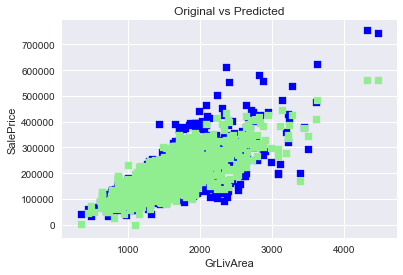

In [306]:
# Plot predictions
plt.scatter(train_features.GrLivArea, train_labels, c = "blue", marker = "s", label = "Training data")
plt.scatter(train_features.GrLivArea, train_labels_pred, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Original vs Predicted")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()